# InSituPy demonstration - InSituExperiment

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import read_xenium
import scanpy as sc
from insitupy import InSituExperiment

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load Xenium data into `InSituData` object

Now the Xenium data can be parsed by providing the data path to the `InSituPy` project folder.

In [4]:
insitupy_project = Path("demo_dataset/demo_insitupy_project")
xd = read_xenium(insitupy_project)
xd.load_all(skip="transcripts")

Loading annotations...
Loading cells...
	No alternative cells found...
Loading images...
Loading regions...


In [5]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'annotations', 'spatial'
           varm: 'OT', 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connectivities', 'distances'
       boundaries
           BoundariesData obj

### Create `InSituExperiment`

#### Method 1: Manually add `InSituData` objects

In [6]:
exp = InSituExperiment()
exp.add(
    data=xd,
    metadata={
        "slide_id": xd.slide_id,
        "sample_id": xd.sample_id,
        "patient": "A"
    }
    )

In [7]:
exp

InSituExperiment with 1 samples:
           uid slide_id    sample_id patient
0     eb53542a  0001879  Replicate 1       A

In the same way also other datasets can be added. For demonstration purposes, we just add the same dataset again and change the metadata.

In [8]:
exp.add(
    data=xd,
    metadata={
        "slide_id": xd.slide_id,
        "sample_id": xd.sample_id,
        "patient": "A",
        "therapy": "drugB"
    }
    )

In [9]:
exp

InSituExperiment with 2 samples:
           uid slide_id    sample_id patient therapy
0     eb53542a  0001879  Replicate 1       A     NaN
1     8b908c41  0001879  Replicate 1       A   drugB

#### Method 2: From config file

As config file either a csv file or an excel file can be used.

Example of a valid configuration file:

| directory         | experiment_name | date       | patient    |
|-------------------|-----------------|------------|------------|
| /path/to/dataset1 | Experiment 1    | 2023-09-01 | Patient A  |
| /path/to/dataset2 | Experiment 2    | 2023-09-02 | Patient B  |

In [10]:
exp = InSituExperiment.from_config(config_path="./demo_dataset/insituexperiment_config.csv")

In [11]:
exp

InSituExperiment with 2 samples:
           uid slide_id    sample_id patient therapy
0     e4d236c9  0001879  Replicate 1       A   drugA
1     21e6d98c  0001879  Replicate 1       B   drugB

#### Method 3: From regions

We can also use regions from an `InSituData` object to split the data into separate datasets and create an `InSituExperiment` from them. This can be used to select the most interesting regions and focus on them for the analysis or to split a TMA dataset into separate datasets for each core.

In [12]:
xd.show()

In [13]:
xd

InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(25778, 35416)
       CD20:	(25778, 35416)
       HER2:	(25778, 35416)
       DAPI:	(25778, 35416)
       HE:	(25778, 35416, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 163565 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'annotations', 'spatial'
           varm: 'OT', 'PCs', 'binned_expression'
           layers: 'counts', 'norm_counts'
           obsp: 'connectivities', 'distances'
       boundaries
           BoundariesData obj

In [14]:
exp = InSituExperiment.from_regions(
    data=xd, region_key="TMA"
)

In [15]:
exp

InSituExperiment with 6 samples:
           uid slide_id    sample_id region_key region_name
0     22faa32c  0001879  Replicate 1        TMA         A-1
1     7ac185bb  0001879  Replicate 1        TMA         A-2
2     9deeacd7  0001879  Replicate 1        TMA         A-3
3     8bdc7f98  0001879  Replicate 1        TMA         B-1
4     b501e999  0001879  Replicate 1        TMA         B-2
5     c4ad0917  0001879  Replicate 1        TMA         B-3

In [17]:
viewer = exp.show(2)

## Plot overview of metadata and QC metrics

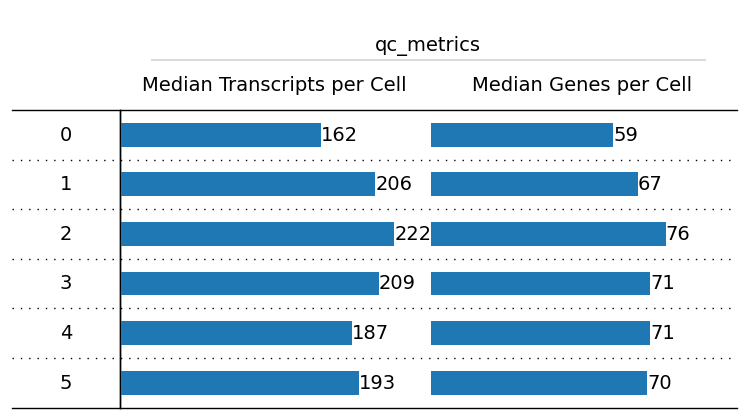

In [19]:
exp.plot_overview()

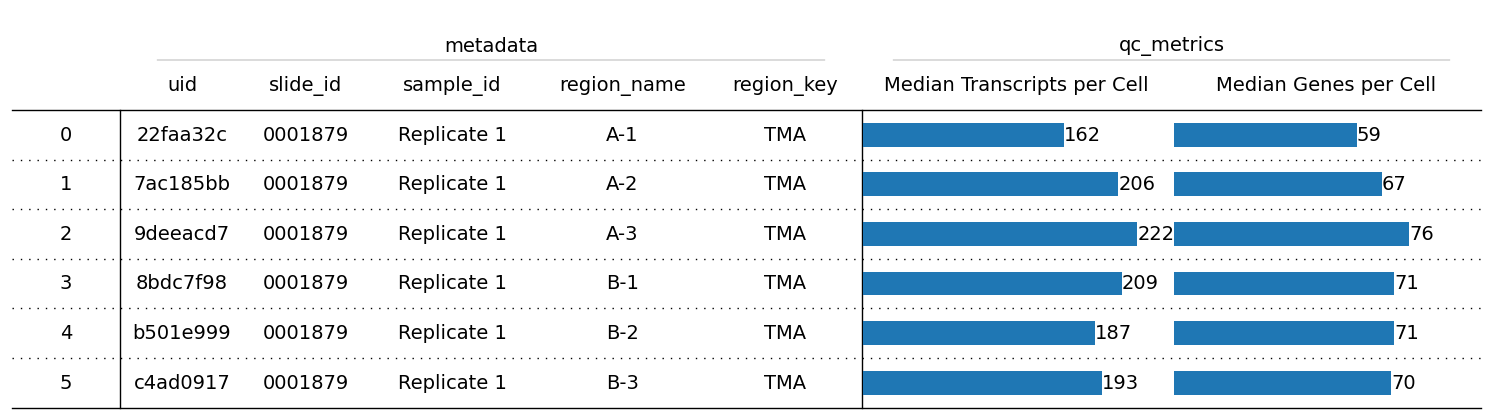

In [20]:
exp.plot_overview(["uid", "slide_id", "sample_id", "region_name", "region_key"], index=True)

## Iterate through `InSituExperiment` using `.iterdata()` method

In [21]:
for metadata, data in exp.iterdata():
    print(f"Metadata:\n{metadata[:3]}\nData:\n{data}")

Metadata:
uid             22faa32c
slide_id         0001879
sample_id    Replicate 1
Name: 0, dtype: object
Data:
InSituData
Method:		Xenium
Slide ID:	0001879
Sample ID:	Replicate 1
Path:		C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project
Metadata file:	.ispy
    ➤ images
       nuclei:	(4706, 4706)
       CD20:	(4706, 4706)
       HER2:	(4706, 4706)
       DAPI:	(4706, 4706)
       HE:	(4706, 4706, 3)
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 6743 × 313
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
           var: 'gene_ids', 'feature_types', 'genome'
           uns: 'cell_type_colors', 'counts_location', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
           obsm: 'OT', 'X_pca', 'X_umap', 'annotations', 'spatial'
           varm: 'OT', 'PCs', 'binned_expression'
           layers: 'counts', 'norm_

## Add new metadata

In the following section different scenarios for adding new metadata are shown.

In [22]:
exp1 = InSituExperiment.from_regions(
    data=xd, region_key="demo_regions"
)

In [23]:
exp1

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name
0     1ef58c74  0001879  Replicate 1  demo_regions     Region1
1     26b447cc  0001879  Replicate 1  demo_regions     Region2
2     757fe9e3  0001879  Replicate 1  demo_regions     Region3

In [24]:
exp2 = exp1.copy()
exp2.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata.csv",
    by="region_name", overwrite=True
)

In [25]:
exp2

InSituExperiment with 3 samples:
           uid slide_id    sample_id region_name therapy   organ      test region_key
0     1ef58c74  0001879  Replicate 1     Region1   drugC   liver  negative       key1
1     26b447cc  0001879  Replicate 1     Region2   drugD    lung      test       key3
2     757fe9e3  0001879  Replicate 1     Region3   drugE  spleen  positive       key2

In [26]:

exp3 = exp1.copy()
exp3.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata.csv",
    by="region_name", overwrite=False
)

In [27]:
exp3

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name   organ      test therapy
0     1ef58c74  0001879  Replicate 1  demo_regions     Region1   liver  negative   drugC
1     26b447cc  0001879  Replicate 1  demo_regions     Region2    lung      test   drugD
2     757fe9e3  0001879  Replicate 1  demo_regions     Region3  spleen  positive   drugE

In [28]:
exp4 = exp1.copy()
exp4.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata2.csv",
    by="region_name", overwrite=False
)

In [29]:
exp4

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name   organ      test therapy
0     1ef58c74  0001879  Replicate 1  demo_regions     Region1   liver  negative   drugC
1     26b447cc  0001879  Replicate 1  demo_regions     Region2     NaN       NaN     NaN
2     757fe9e3  0001879  Replicate 1  demo_regions     Region3  spleen  positive   drugE

In [30]:
exp5 = exp1.copy()
exp5.append_metadata(
    new_metadata="./demo_dataset/insituexperiment_new_metadata2.csv",
    by="region_name", overwrite=True
)

In [31]:
exp5

InSituExperiment with 3 samples:
           uid slide_id    sample_id region_name therapy   organ      test region_key
0     1ef58c74  0001879  Replicate 1     Region1   drugC   liver  negative       key1
1     26b447cc  0001879  Replicate 1     Region2     NaN     NaN       NaN        NaN
2     757fe9e3  0001879  Replicate 1     Region3   drugE  spleen  positive       key2

Concatenate multiple `InSituExperiment` objects

In [32]:
exp

InSituExperiment with 6 samples:
           uid slide_id    sample_id region_key region_name
0     22faa32c  0001879  Replicate 1        TMA         A-1
1     7ac185bb  0001879  Replicate 1        TMA         A-2
2     9deeacd7  0001879  Replicate 1        TMA         A-3
3     8bdc7f98  0001879  Replicate 1        TMA         B-1
4     b501e999  0001879  Replicate 1        TMA         B-2
5     c4ad0917  0001879  Replicate 1        TMA         B-3

In [33]:
exp1

InSituExperiment with 3 samples:
           uid slide_id    sample_id    region_key region_name
0     1ef58c74  0001879  Replicate 1  demo_regions     Region1
1     26b447cc  0001879  Replicate 1  demo_regions     Region2
2     757fe9e3  0001879  Replicate 1  demo_regions     Region3

In [34]:
exp_concat = InSituExperiment.concat(
    objs={
        "exp_TMA": exp,
        "exp_demo_regions": exp1
    },
    new_col_name="name"
    )

In [35]:
exp_concat

InSituExperiment with 9 samples:
           uid slide_id    sample_id    region_key region_name              name
0     22faa32c  0001879  Replicate 1           TMA         A-1           exp_TMA
1     7ac185bb  0001879  Replicate 1           TMA         A-2           exp_TMA
2     9deeacd7  0001879  Replicate 1           TMA         A-3           exp_TMA
3     8bdc7f98  0001879  Replicate 1           TMA         B-1           exp_TMA
4     b501e999  0001879  Replicate 1           TMA         B-2           exp_TMA
5     c4ad0917  0001879  Replicate 1           TMA         B-3           exp_TMA
6     1ef58c74  0001879  Replicate 1  demo_regions     Region1  exp_demo_regions
7     26b447cc  0001879  Replicate 1  demo_regions     Region2  exp_demo_regions
8     757fe9e3  0001879  Replicate 1  demo_regions     Region3  exp_demo_regions

In [36]:
exp_concat = InSituExperiment.concat(
    objs=[exp, exp1])

In [37]:
exp_concat

InSituExperiment with 9 samples:
           uid slide_id    sample_id    region_key region_name
0     22faa32c  0001879  Replicate 1           TMA         A-1
1     7ac185bb  0001879  Replicate 1           TMA         A-2
2     9deeacd7  0001879  Replicate 1           TMA         A-3
3     8bdc7f98  0001879  Replicate 1           TMA         B-1
4     b501e999  0001879  Replicate 1           TMA         B-2
5     c4ad0917  0001879  Replicate 1           TMA         B-3
6     1ef58c74  0001879  Replicate 1  demo_regions     Region1
7     26b447cc  0001879  Replicate 1  demo_regions     Region2
8     757fe9e3  0001879  Replicate 1  demo_regions     Region3